In [1]:
import os
import numpy  as np
import pandas as pd
import tables as tb

%matplotlib ipympl
import matplotlib.pyplot as plt

from invisible_cities.reco.corrections import read_maps

In [2]:
map_filename = os.path.expandvars("$HOME/NEXT/DATA/LightTables/map_NEXT100_MC.h5")
maps = read_maps(map_filename)

lt_filename = os.path.expandvars("$HOME/NEXT/DATA/LightTables/NEXT100_S2_LT.h5")
LT = pd.read_hdf(lt_filename, "LT/LightTable")

lifetime = 10000*0.84

f = (41.557/22)*1000*1000

In [3]:
xs = np.sort(LT.x.unique())
ys = np.sort(LT.y.unique())

dx = 20
dy = 20
xmin, xmax = -510, 510
ymin, ymax = -510, 510
xbins = np.arange(xmin, xmax+dx, dx)
ybins = np.arange(ymin, ymax+dy, dy)

In [4]:
# E0 dataframe
h, _, _ = np.histogram2d(LT.x, LT.y, bins=[xbins, ybins], weights=LT.PmtR11410_total)
h *= f
h[h==0] = np.nan

E0 = pd.DataFrame(h)

In [5]:
# lifetime dataframe
h = h.copy()
h[~np.isnan(h)] = lifetime
lt = pd.DataFrame(h)

# chi2, ltu, e0u dummies
dum = lt.copy()
dum.loc[:] = 1

In [6]:
mapinfo = pd.DataFrame(data = {"xmin": [xmin], "xmax": [xmax]
                              ,"ymin": [ymin], "ymax": [ymax]
                              ,  "nx": [E0.shape[0]], "ny": [E0.shape[1]]
                              , "run_number": 0})

mapinfo = mapinfo.transpose()
mapinfo = mapinfo.rename({0: "values"}, axis=1)

In [7]:
filename = "map_NEXT100_LT.h5"

E0 .to_hdf(filename, key="e0")
lt .to_hdf(filename, key="lt")

dum.to_hdf(filename, key="chi2")
dum.to_hdf(filename, key="ltu")
dum.to_hdf(filename, key="e0u")
mapinfo["values"].to_hdf(filename, key="mapinfo")

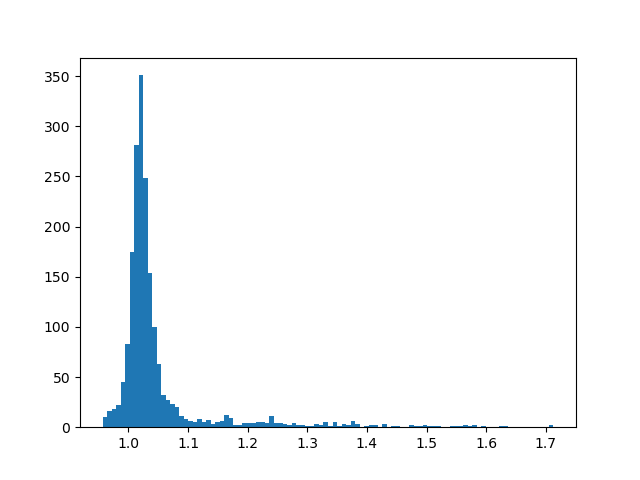

In [8]:
plt.figure()
plt.hist((maps.e0/E0).values.flatten(), bins=100);